Test has accuracy of 100.00%


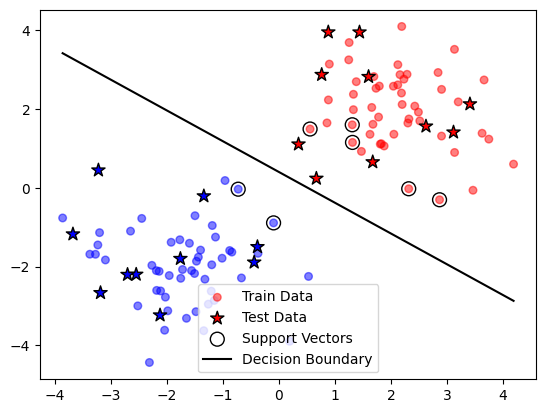

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n_train_samples = 100

X1_train = np.random.randn(n_train_samples // 2, 2) + np.array([2, 2])
y1_train = np.ones(n_train_samples // 2)

X2_train = np.random.randn(n_train_samples // 2, 2) + np.array([-2, -2])
y2_train = -np.ones(n_train_samples // 2)


X_train = np.vstack((X1_train, X2_train))
y_train = np.hstack((y1_train, y2_train))

n_test_samples = 20

X1_test = np.random.randn(n_test_samples // 2, 2) + np.array([2,2])
y1_test  = np.ones(n_test_samples // 2)

X2_test = np.random.randn(n_test_samples // 2, 2) + np.array([-2,-2])
y2_test  = -np.ones(n_test_samples // 2)


X_test = np.vstack((X1_test, X2_test))
y_test = np.hstack((y1_test, y2_test))

#training the SVM model using x1, x2 training

def linear_kernel(x1,x2):
  return np.dot(x1, x2)

def svm_train(X, y, C = 1.0, tol = 1e-3, max_passes = 5):
    n_samples, n_features = X.shape
    alpha = np.zeros(n_samples)
    b = 0
    passes = 0
    while passes < max_passes:
      alpha_prev = np.copy(alpha)
      for i in range(n_samples):
        xi, yi = X[i], y[i]
        Ei = np.dot(alpha*y, [linear_kernel(X[j], xi) for j in range(n_samples)]) + b - yi
        if (yi * Ei < -tol and alpha[i] < C ) or (yi * Ei > tol and alpha[i]> 0 ):
          j = np.random.choice([x for x in range (n_samples) if x != i ])
          xj, yj = X[j],y[j]
          Ej = np.dot(alpha *y, [linear_kernel(X[k], xj) for k in range(n_samples)]) + b - yj
          alpha_i_old, alpha_j_old = alpha[i], alpha[j]
          if y[i] == y[j]:
            L = max(0, alpha[j] + alpha[i] - C)
            H = min(C, alpha[j] + alpha[i])
          else:
            L = max(0, alpha[j] - alpha[i])
            H = min(C, C + alpha[j] - alpha[i])
          if L == H :
            continue
          eta = 2 * linear_kernel(xi,xj) - linear_kernel(xi,xi) - linear_kernel(xj, xj)
          if eta >= 0:
            continue
          alpha[j] -= yj * (Ei - Ej) / eta
          alpha[j] = np.clip(alpha[j], L, H)
          if np.abs(alpha[j] - alpha_j_old) < tol:
            continue
          alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])
          b1 = b - Ei - y[i] * (alpha[i] - alpha_i_old) * linear_kernel(xi,xi) - y[j] * (alpha[j] - alpha_j_old) * linear_kernel(xj,xj)
          b2 = b - Ej - y[i] * (alpha[i] - alpha_i_old) * linear_kernel(xi,xi)  -y[j] * (alpha[j] - alpha_j_old) * linear_kernel(xj,xj)
          if 0 < alpha[i]< C :
            b = b1
          elif 0< alpha[j]< C:
            b = b2
          else :
            b = (b1+b2) / 2
      if np.linalg.norm(alpha - alpha_prev)< tol:
        passes += 1
      else :
        passes = 0

    w = np.dot(alpha* y , X)
    return w, b, alpha

w, b, alpha = svm_train(X_train, y_train)

def svm_predict(X, w, b):
  return np.sign(np.dot(X, w) + b)


y_pred = svm_predict(X_test, w, b)


accuracy = np.mean(y_pred == y_test)
print(f"Test has accuracy of {accuracy * 100:.2f}%")


def plot_decision_boundary_with_test_data(X_train, y_train,X_test, y_test, w, b, alpha):
    plt.scatter(X_train[:, 0], X_train[:,1], c = y_train, s = 30, cmap='bwr', alpha = 0.5, label = 'Train Data')
    plt.scatter(X_test[:,0], X_test[:, 1], c = y_test, s= 100, cmap = 'bwr', marker = '*', label = 'Test Data', edgecolors ='k' )


    support_vectors = X_train[alpha > 1e-4]
    plt.scatter(support_vectors[:,0], support_vectors[:, 1], s= 100, facecolors = 'none', edgecolors = 'k', label = 'Support Vectors')

    #D_B
    x_min, x
    _max = np.min(X_train[:, 0]), np.max(X_train[:, 0])
    x_boundary = np.linspace(x_min, x_max, 100)
    y_boundary = -(w[0] * x_boundary + b) / w[1]

    plt.plot(x_boundary, y_boundary, 'k-', label = 'Decision Boundary')
    plt.legend()
    plt.show()


plot_decision_boundary_with_test_data(X_train, y_train, X_test, y_test, w, b, alpha)
